In [1]:
%run lgs03a_data_unification.ipynb

In [2]:
def compare_against_extant(gene, dataset=data_aa, ok=-0.1, nok=-0.2, overlap_n=10):
    gene_name = namekey[gene]
    gene_wt = get_wt_states(gene_name)

    muts_all = {x for x in eval('siffects_'+gene+'_log')}
    muts_all = {x[0] + str(pseudopos_to_nativepos[int(x[1:-1])][genekey[gene]]) + x[-1] for x in muts_all}
    muts_all = muts_all | {x[0:-1] + x[0] for x in muts_all}
    muts_all = {str(nativepos_to_quasipos[int(x[1:-1])][gene_name]) + x[-1] for x in muts_all}
    
    muts_nok = {x for x in eval('siffects_'+gene+'_log') if eval('siffects_'+gene+'_log')[x] < nok}
    muts_nok = {str(pseudopos_to_nativepos[int(x[1:-1])][genekey[gene]]) + x[-1] for x in muts_nok}
    muts_nok = {str(nativepos_to_quasipos[int(x[:-1])][gene_name]) + x[-1] for x in muts_nok}
    
    x = []
    y = []
    for extant in wts:
        if extant=='RrGFP' or extant==namekey[gene]:
            pass
        
        else:
            if extant in ['avGFP', 'ppluGFP2', 'cgreGFP', 'GFPxm']:
                keys = {'avGFP':'av', 'ppluGFP2':'pplu', 'GFPxm':'amac', 'cgreGFP':'cgre'}
                extant_ok = get_wt_states(extant)
#                 extras = set(dataset[singles_mask & eval(gene+'_mask') 
#                            & (dataset.measured_effect > ok)]['quasipos_genotype'])
#                 extant_ok = extant_ok | extras
                extant_ok = {x for x in extant_ok if x not in gene_wt}

                m='*'
                size=150
                ec = 'k'
#                 print(extant)
            else:
                extant_ok = get_wt_states(extant)
                extant_ok = {x for x in extant_ok if x not in gene_wt}
                m='.'
                size=50
                ec = None
                
#             print(extant, m)

            overlap = {x for x in extant_ok if x in muts_all}
            if len(overlap) > overlap_n:
                nok_in_gene = {x for x in overlap if x in muts_nok}
                aa_id = 100 - pairwise[frozenset([extant, namekey[gene]])]
                x.append(aa_id)
                y.append(len(nok_in_gene) / len(overlap))

                plt.scatter(aa_id,len(nok_in_gene) / len(overlap), color=colors[gene],
                            marker=m, s=size, edgecolor=ec)
    legendary([colors[gene] for gene in ['amac', 'cgre', 'pplu', 'av',]], 
              ['amacGFP', 'cgreGFP', 'ppluGFP2', 'avGFP2'])
#             print(gene,extant, len(overlap))        
    return x, y

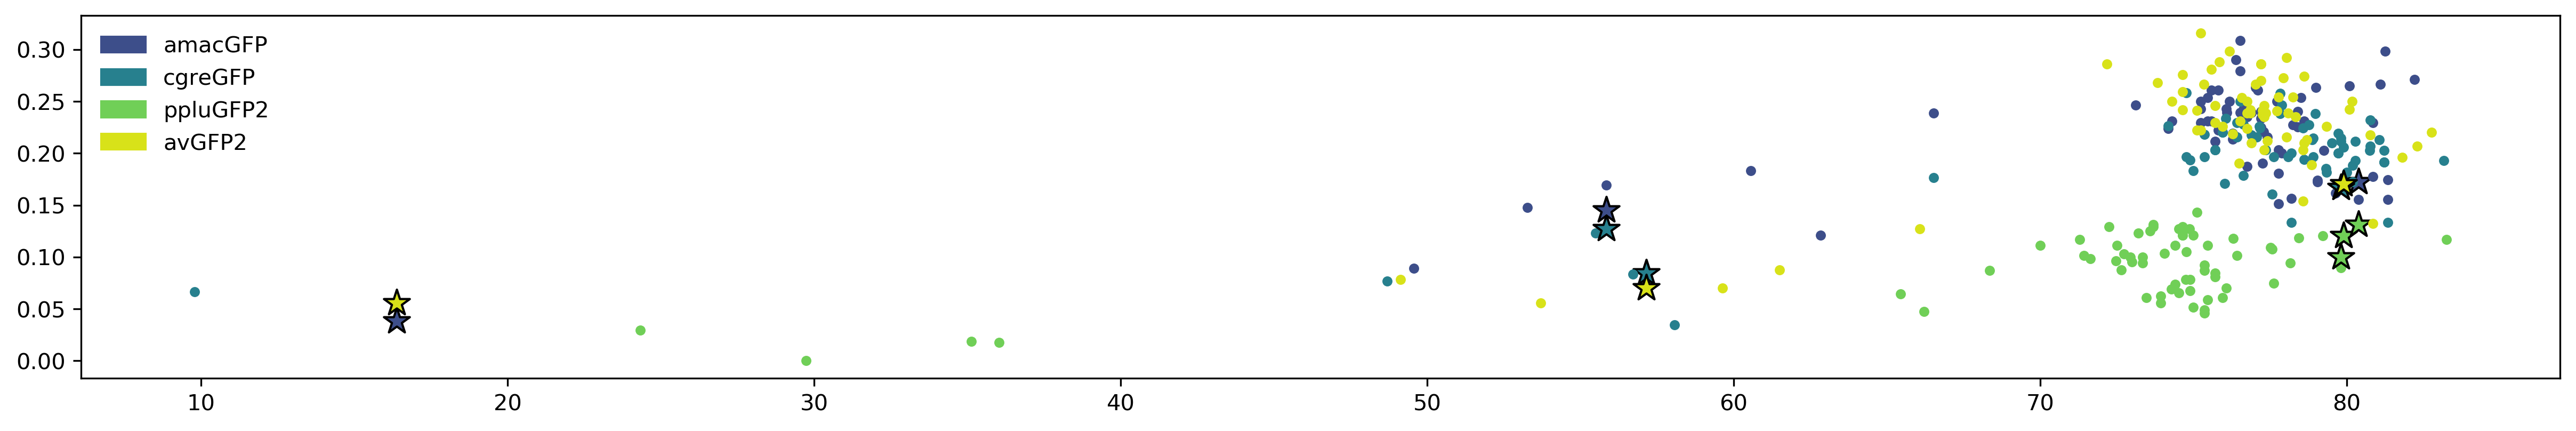

In [4]:
plt.figure(figsize=[20,3], dpi=300)
for gene in ['amac','cgre', 'pplu','av']:
    x,y = compare_against_extant(gene, ok=0.1, nok=-0.15)

In [11]:
def plot_extant_vs_nonextant_muts(gene, dataset=data_aa, y_axis='brightness', palette='mako', n=5):
    c = ListedColormap(sns.color_palette(palette, 256))
    df = dataset[dataset.gene==gene+'GFP'].copy()
    df['f_extant'] = df[['n_mut', 'n_mut_extant']].apply(lambda x:
                                            'all' if x[0]==x[1] else 'none' if x[1]==0 else 'some', axis=1)
    
    plot_half_violin([df[(df['n_mut']==i) & (df['f_extant']=='none')][y_axis] for i in range(1,n)], 
                     side='left', 
                     color=[c(80),c(80)], alpha=1, widths=0.8, chonkylines=True)

    plot_half_violin([df[(df['n_mut']==i) & (df['f_extant']=='all')][y_axis] for i in range(1,n)], 
                     side='right', alpha=1, 
                     color=[c(180), c(180)], widths=0.9, chonkylines=True)
#     plt.ylim(df[y_axis].min() - 0.25, df[y_axis].max() + 0.1)

    label_plot_axis(x = 'Number of mutations', t= gene+'GFP', y='Brightness')
    plt.xticks(range(n-1), range(1,1+n))

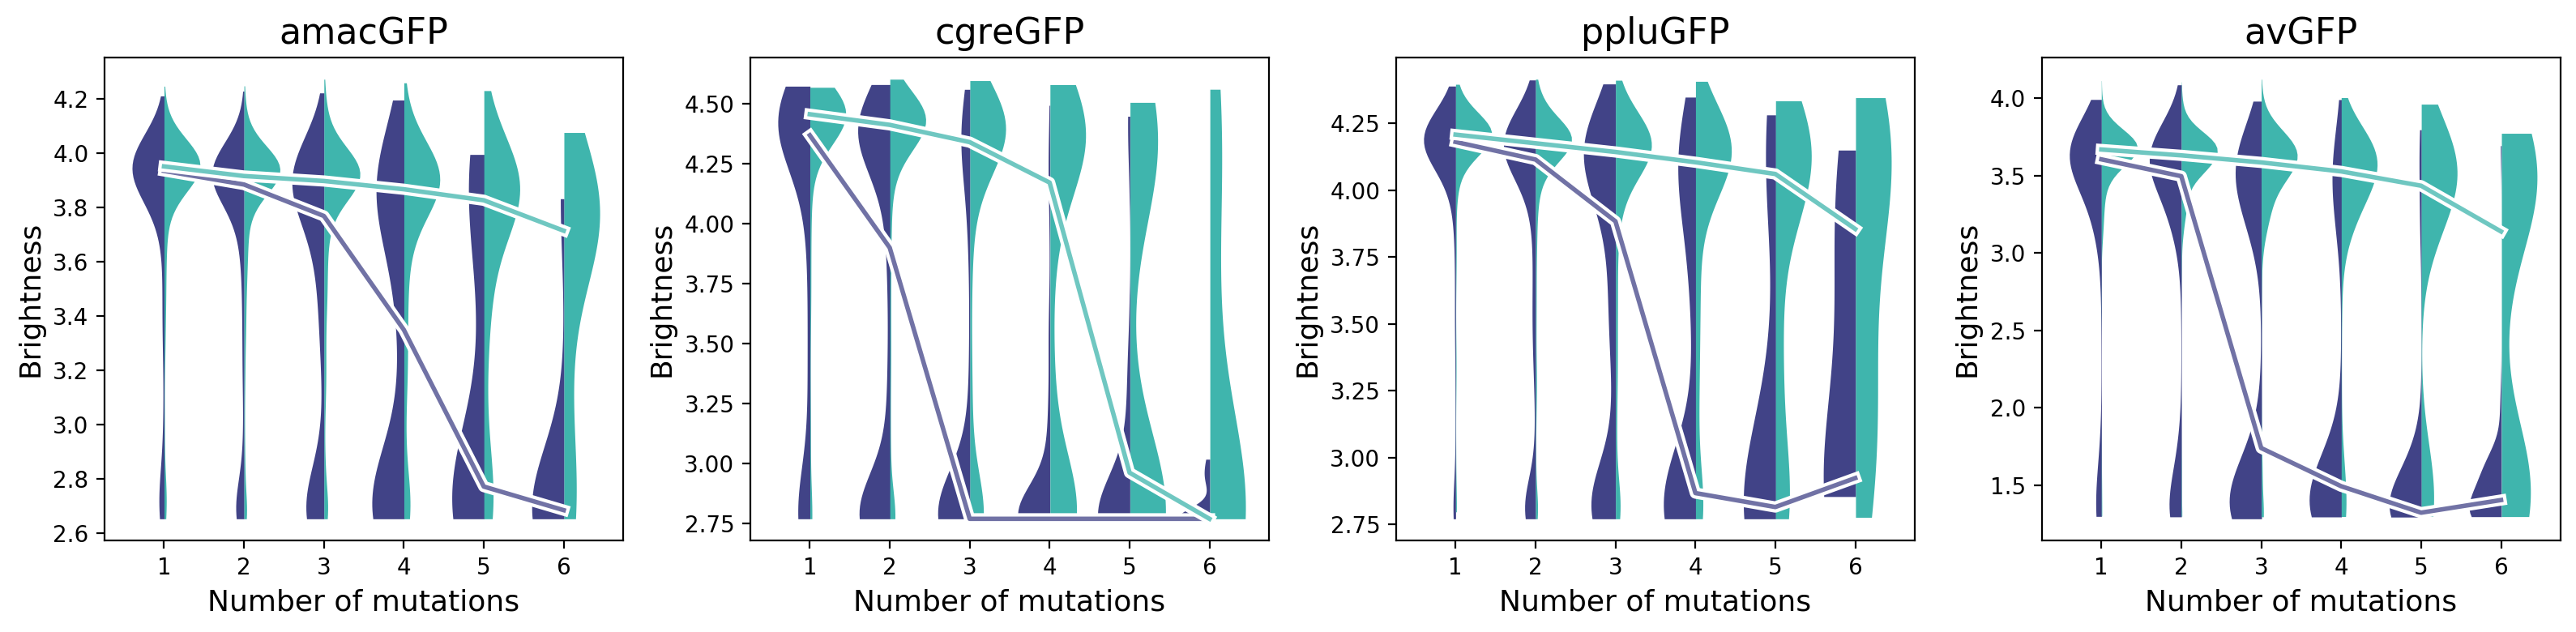

In [12]:
axes = subplots(nplots=4, nplots_per_row=4)
for ax,gene in zip(axes, ['amac','cgre','pplu','av']):
    plt.sca(ax)
    plot_extant_vs_nonextant_muts(gene, n=7)
plt.tight_layout()